# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Disini saya menggunakan dataset Mobile App Store yang tersedia di: https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps
Dimana dataset ini memuat data tentang aplikasi yang tersedia di appstore, memuat beberapa variabel seperti nama aplikasi, rating, harga, dan lain - lain.
- Jumlah kolom 17
- Jumlah baris : 7197

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df_before = pd.read_csv('https://raw.githubusercontent.com/syifagusriani/pad-assets/refs/heads/main/AppleStore.csv')
df_before.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [ ]:
missing_values = df_before.isnull().sum()
missing_values[missing_values > 0]

,0


**Insight:**
- Pemilihan dataset sudah sesuai ketentuan karena mengandung data kategorikal (genre) dan numerik (price, rating, dan lain - lain).
- Tidak ada missing value.


In [ ]:
numeric_data_df = df_before.select_dtypes(include=['number'])

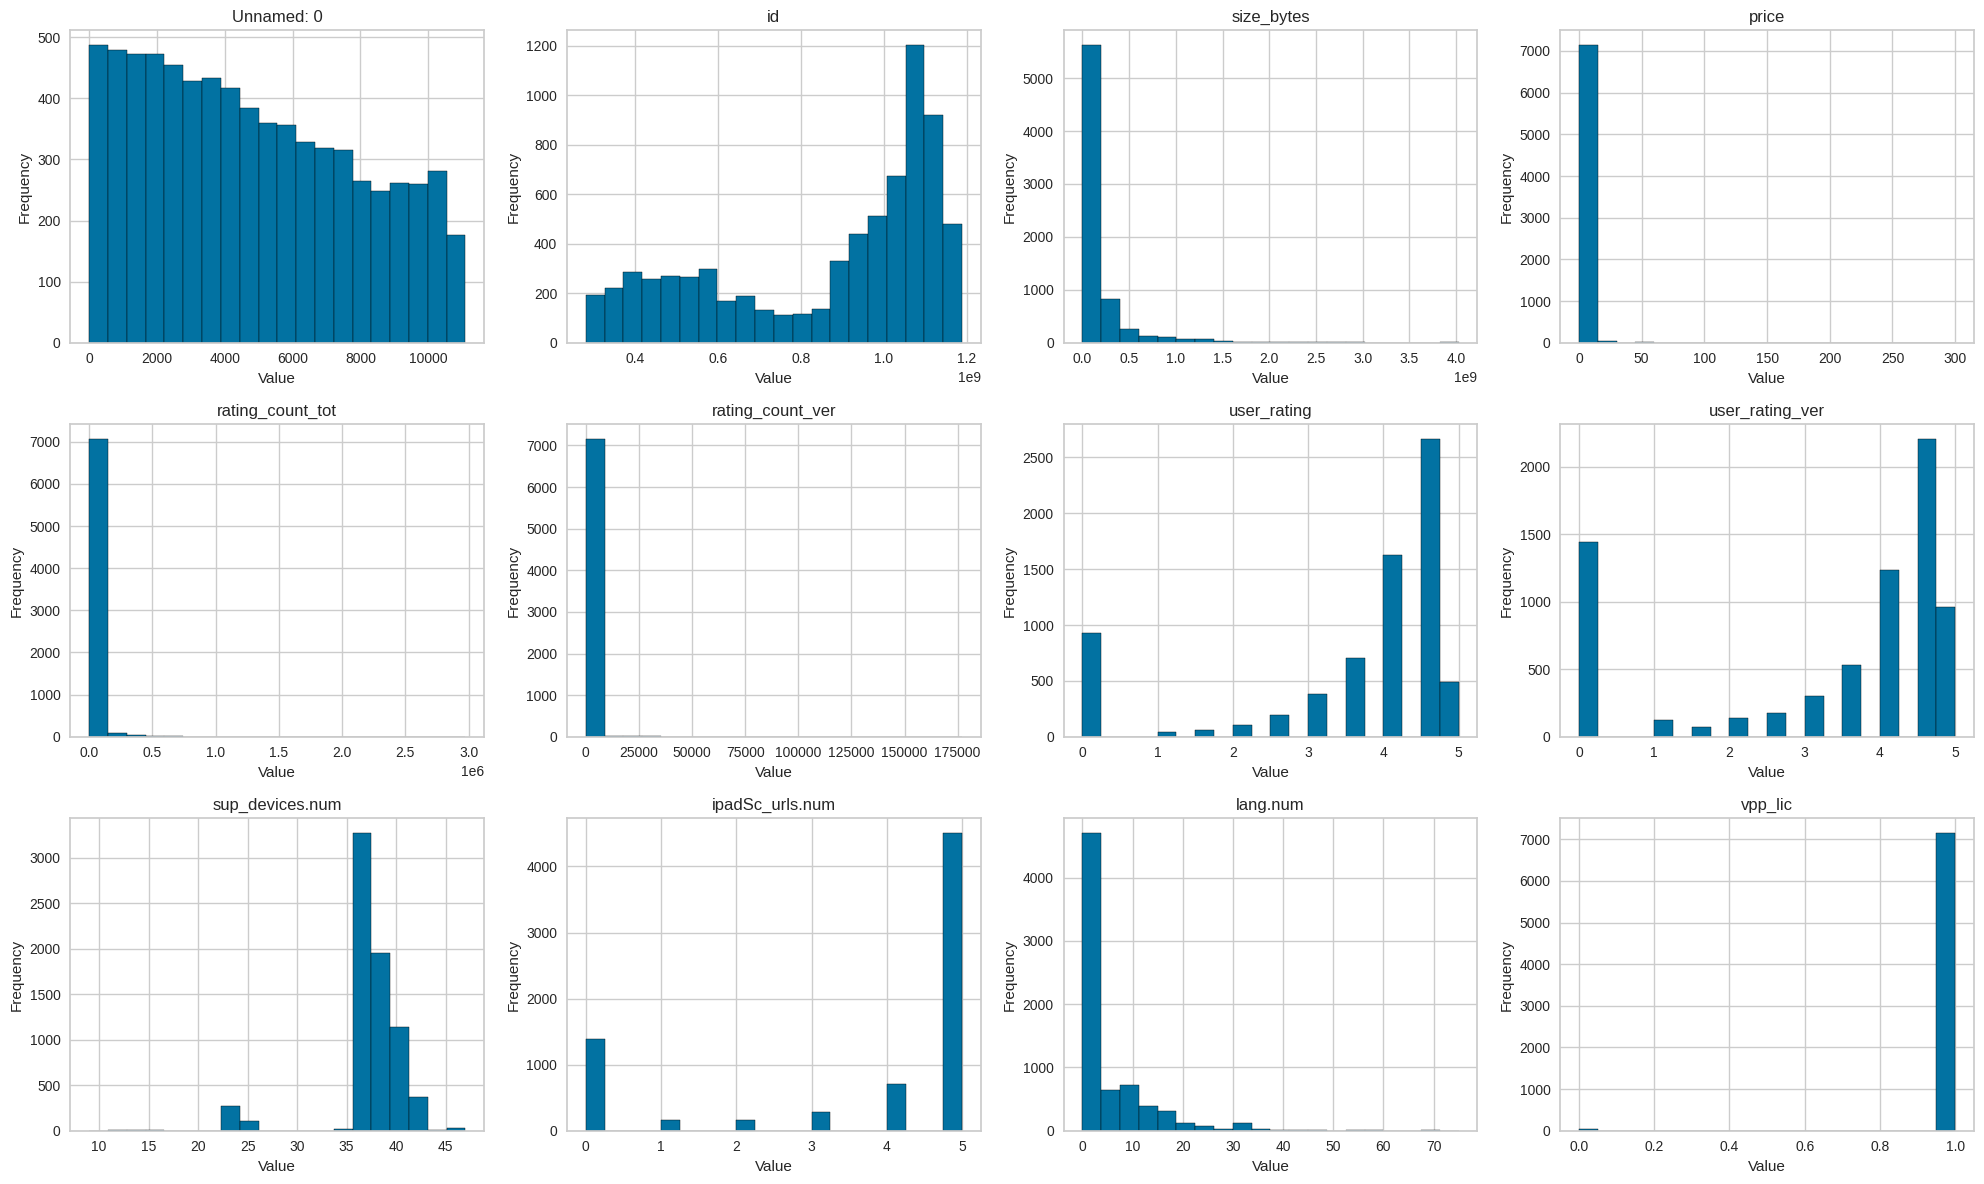

In [ ]:
# Menghitung jumlah variabel
num_vars = numeric_data_df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(numeric_data_df.columns):
    numeric_data_df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

**Insight:**

- Dari hasil diagram sebaran data, khusus data numerik belum dinormalisasi, dilihat dari sebarannya yang cukup jauh antar diagram. Ada yang rentang 1-5, ada yang nilainya mencapai ribuan, dan lain - lain.


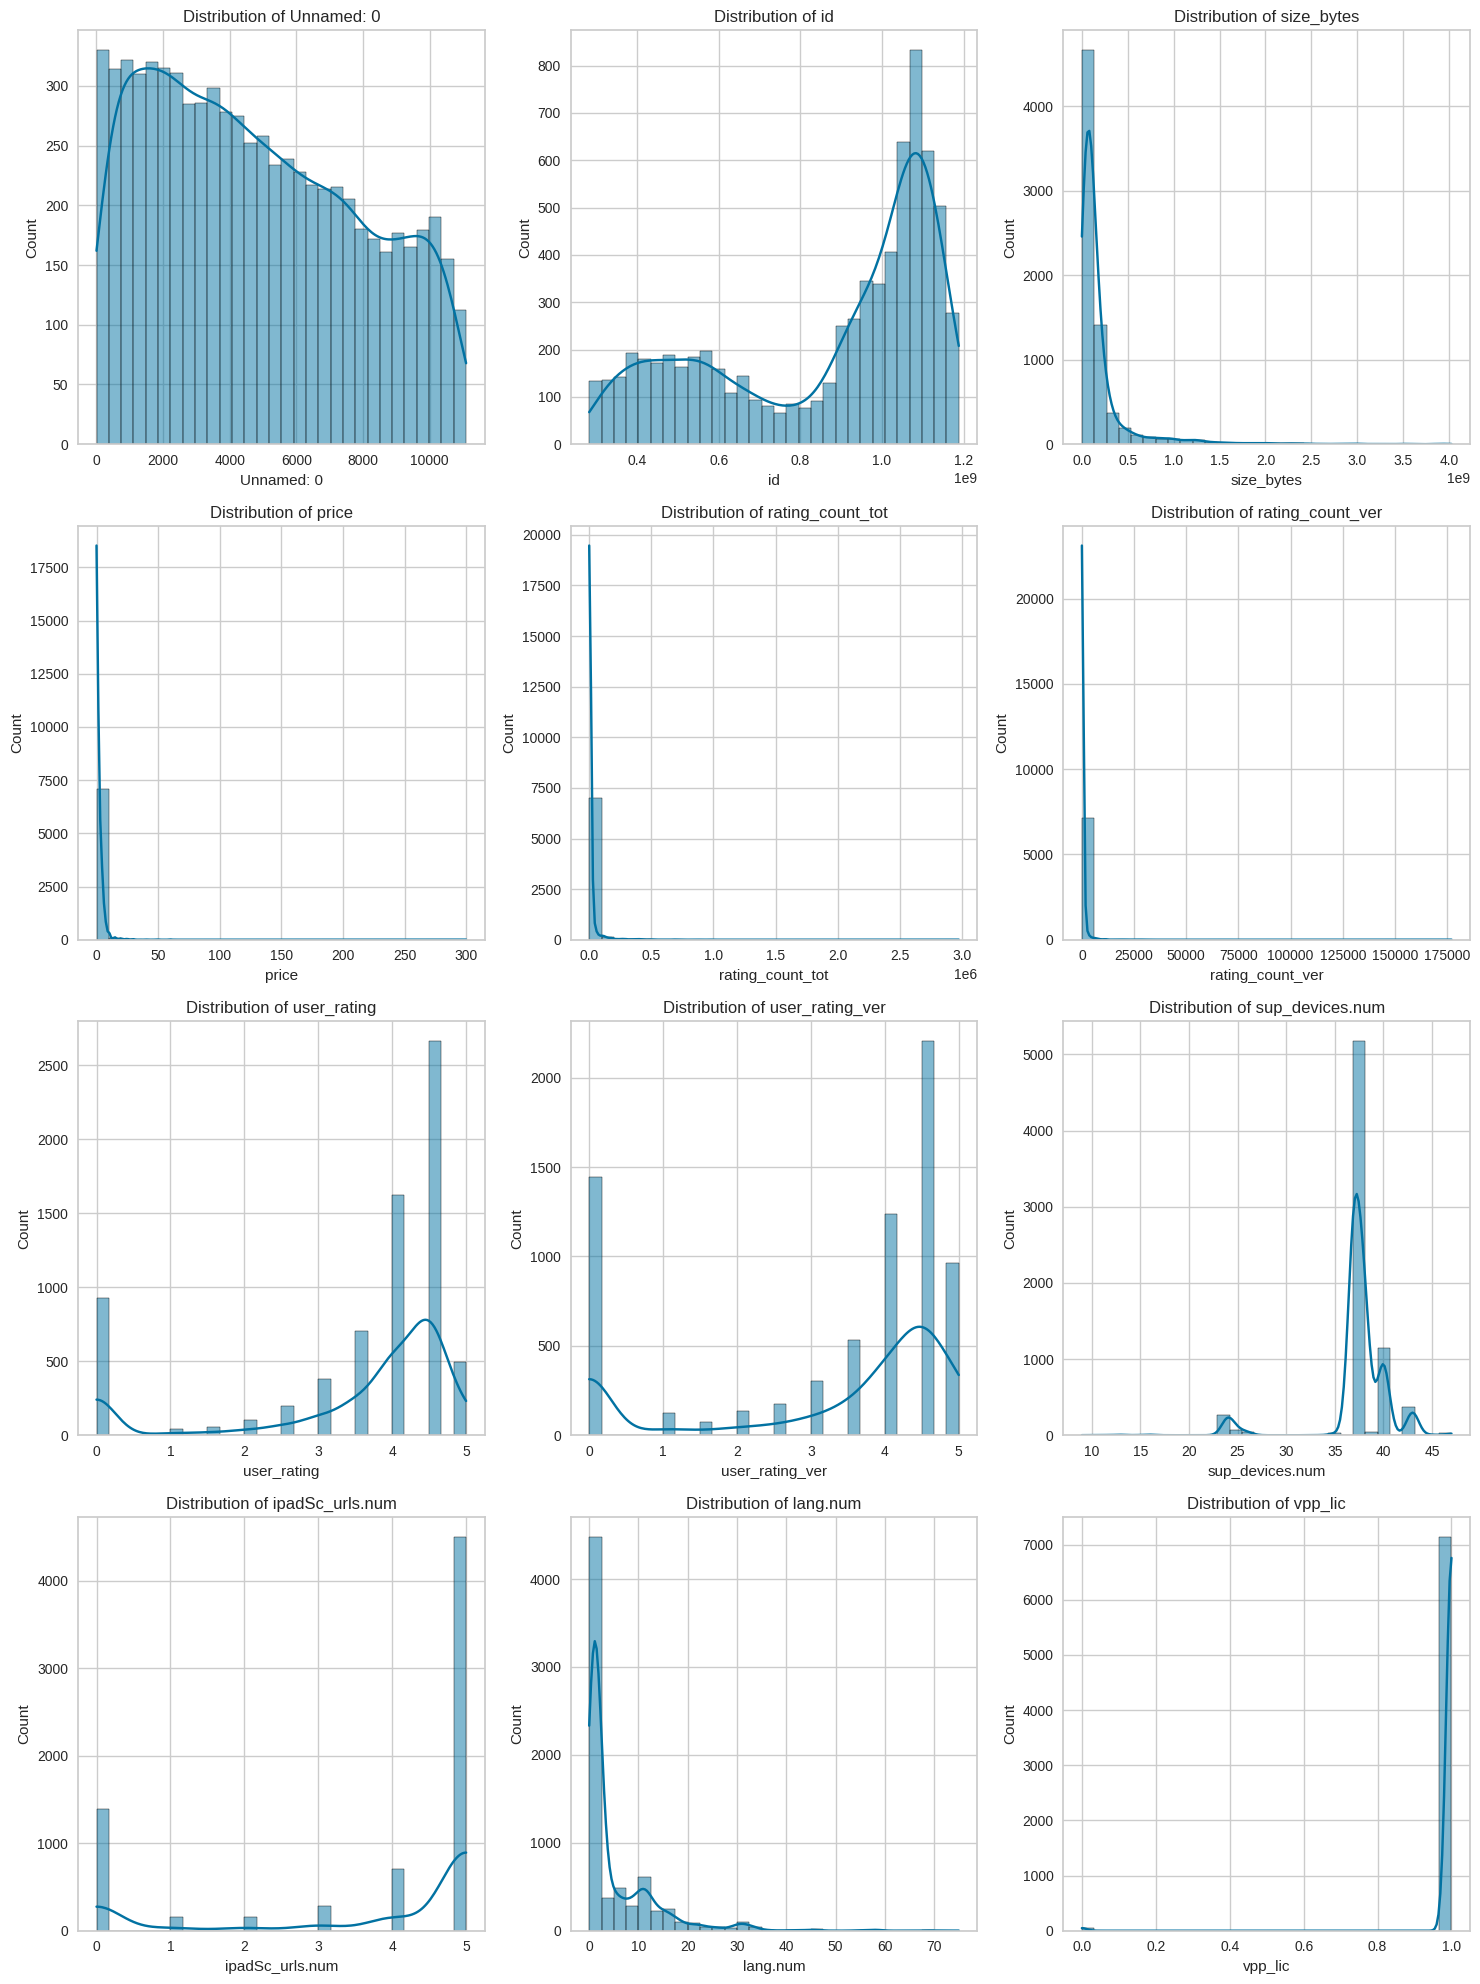

In [ ]:
# Deteksi kolom numerik
numeric_columns = df_before.select_dtypes(include=['int64', 'float64']).columns

# Menentukan jumlah baris dan kolom grid
n_cols = 3  # Jumlah kolom dalam grid
n_rows = -(-len(numeric_columns) // n_cols)  # Membulatkan ke atas jumlah baris

# Membuat grid subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes jika diperlukan untuk iterasi
axes = axes.flatten()

# Plot distribusi untuk setiap kolom numerik
for i, column in enumerate(numeric_columns):
    sns.histplot(df_before[column], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {column}')

# Menghapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight:**

Dilanjutkan dengan diagram distirbusi data, dimana kecenderungan masing - masing data berbeda - beda.
  - Unamed yang merupakan kolom anomali, tidak memperlihatkan dengan jelas sebaran datanya.
  - Begitupula dengan kolom ID yang merupakan id masing - masing aplikasi, juga tidak memiliki sebaran data yang jelas.
  - size_bytes, yang merupakan ukuran aplikasi, memiliki distribusi sangat miring ke kanan dengan mayoritas aplikasi berukuran kecil (walaupun dengan satuan 1e9).
  - price cenderung memiliki sebaran data ke kiri, yang mana banyak aplikasi yang harganya 0 (gratis) daripada berbayar. Hanya sebagian kecil aplikasi yang memiliki harga tinggi, menjadikan distribusinya sangat tidak merata.
  - rating_count_tot merupakan jumlah user rating di semua versi aplikasi. Distribusinya sangat skewed ke kanan. Sebagian besar aplikasi memiliki jumlah ulasan (review) yang rendah, sedangkan sedikit aplikasi memiliki jumlah ulasan yang sangat tinggi. Mirip dengan rating_count_tot, rating_count_ver juga miring ke kanan. Sebagian besar aplikasi memiliki ulasan sedikit pada versi terbaru, sementara outlier menunjukkan aplikasi populer.
  -  Pada user_rating, Distribusi cukup terpusat pada rating tinggi (4 hingga 5). Ini menunjukkan kebanyakan aplikasi memiliki rating positif dari pengguna. Pola user_rating_ver mirip dengan user_rating, tetapi ini khusus untuk versi terbaru aplikasi.
  - sup_devices.num merupakan jumlah perangkat yang support aplikasi ini. Distribusinta sangat terpusat di sekitar 30-40. Ini menunjukkan kebanyakan aplikasi mendukung jumlah perangkat yang serupa.
  - ipadSc_urls.num merupakan jumlah screenshots aplikasi. Data cukup miring ke kanan Kebanyakan aplikasi memiliki 0-2 URL screenshot, dengan sedikit aplikasi yang memiliki lebih banyak.
  - lang.num merupakan jumlah bahasa yang di provide oleh aplikasi. Distribusinya miring ke kanan, mayoritas aplikasi mendukung 1–5 bahasa. Aplikasi yang mendukung lebih banyak bahasa adalah outlier.
  - vpp_lic merupakan kolom aplikasi yang menggunakan fitur Volume Purchase Program (VPP)Sebagian besar nilai vpp_lic adalah 0. Ini menandakan fitur Volume Purchase Program (VPP) tidak banyak digunakan.

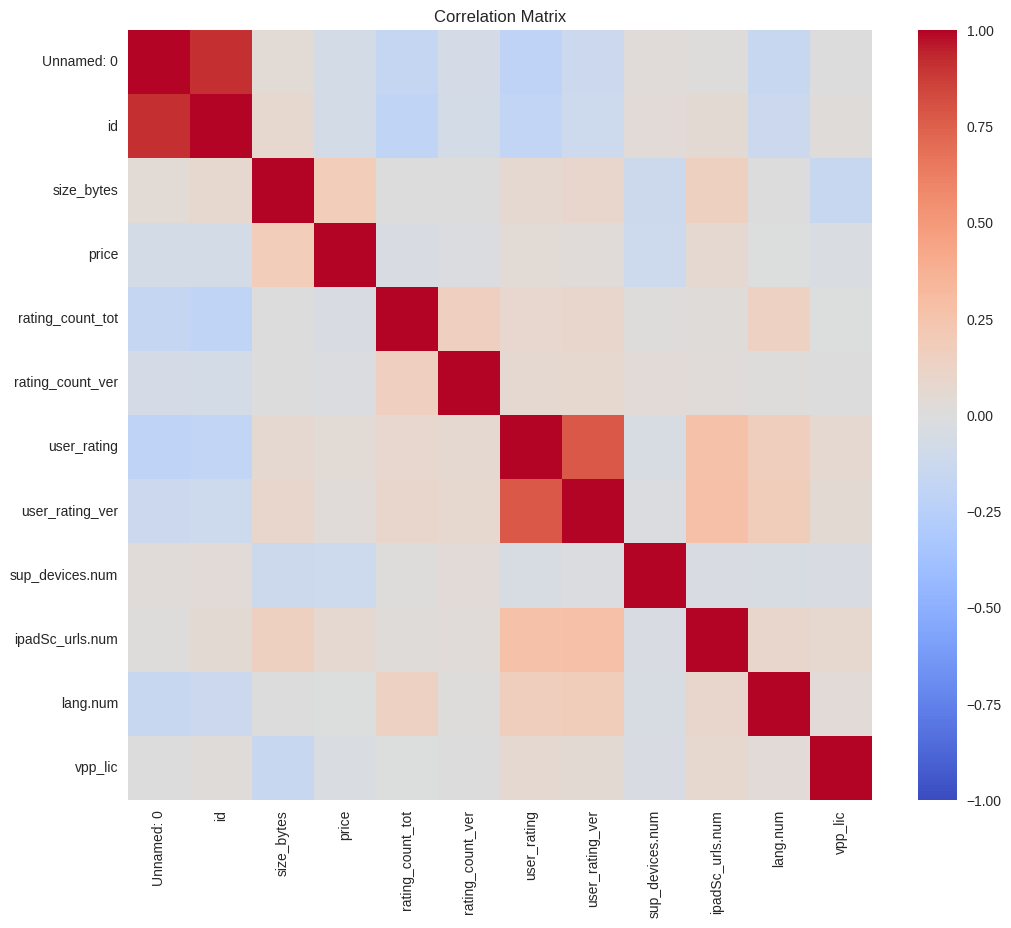

In [ ]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_data_df.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Insight:**
Berdasarkan correlation matrix diatas:

- Kolom yang sangat berkorelasi positif:
  - rating_count_tot dan rating_count_ver memiliki korelasi mendekati 1.
  - user_rating dan user_rating_ver memiliki korelasi yang cukup tinggi.
  - size_bytes dan price menunjukkan korelasi positif kecil (~0.25).

- Kolom dengan korelasi rendah atau hampir tidak ada:
  - Unnamed: 0 memiliki korelasi rendah dengan semua kolom lainnya, menandakan kolom ini hanya indeks atau ID dan tidak berhubungan dengan data.
  - id juga memiliki korelasi sangat kecil dengan kolom lain.
  - vpp_lic menunjukkan hampir tidak ada korelasi dengan variabel lain.

- Korelasi Negatif:
  Hampir tidak ada korelasi negatif yang signifikan dalam dataset ini.

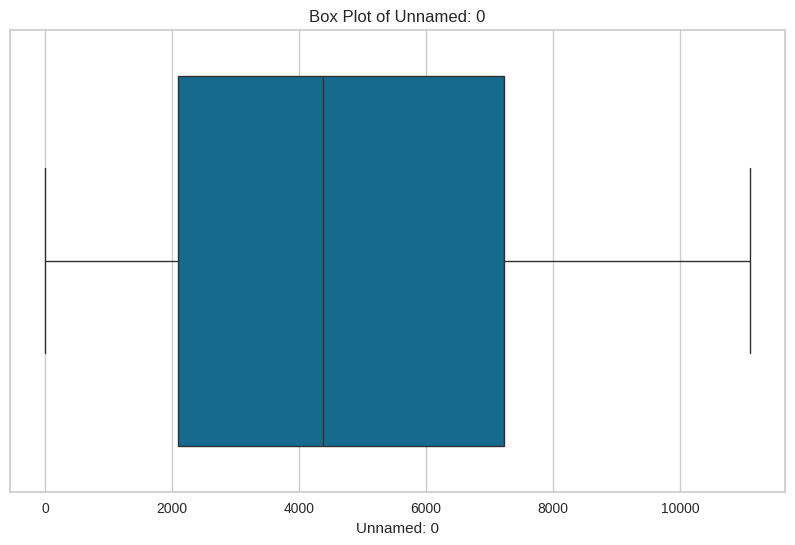

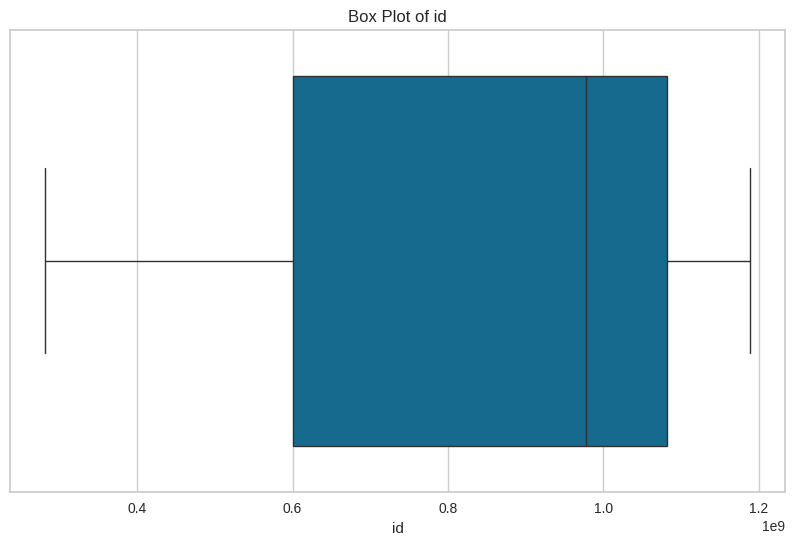

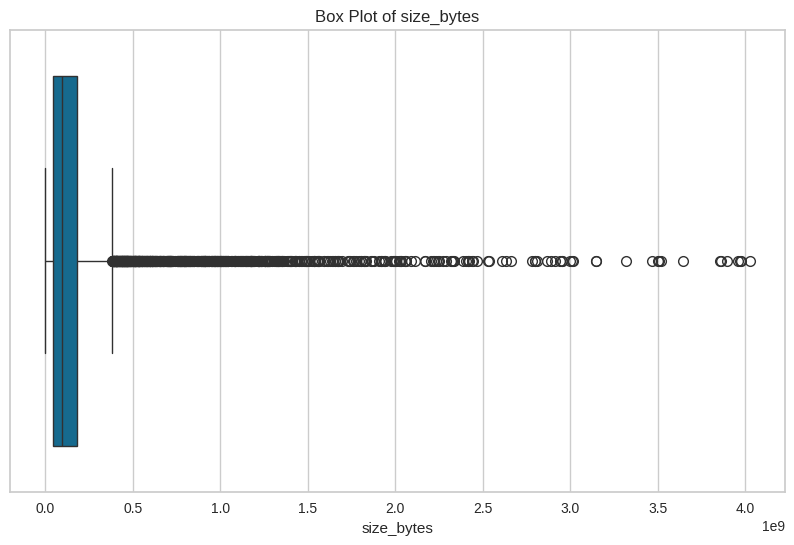

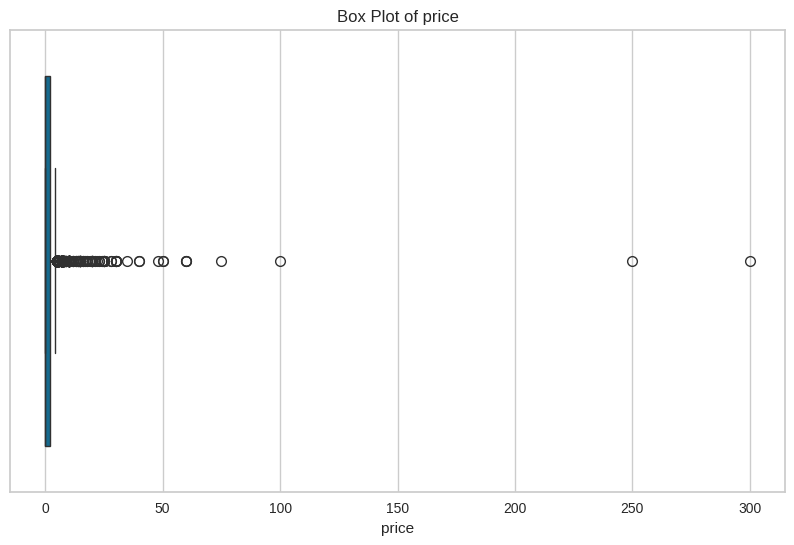

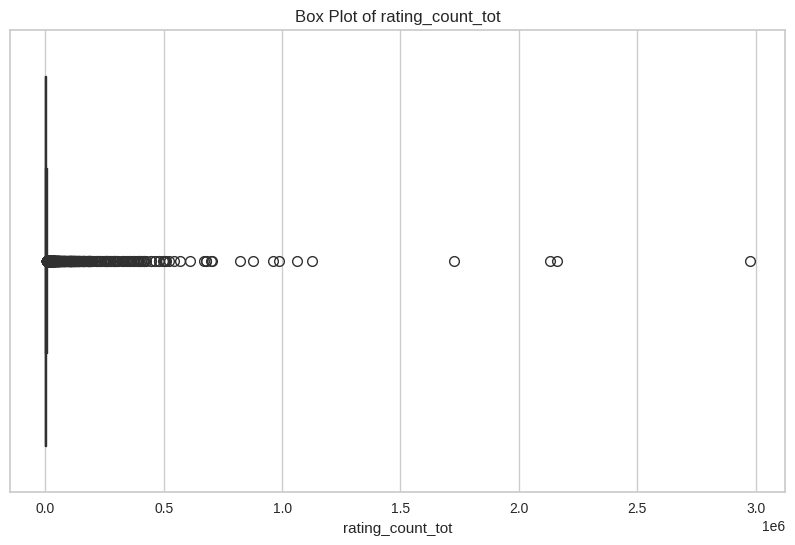

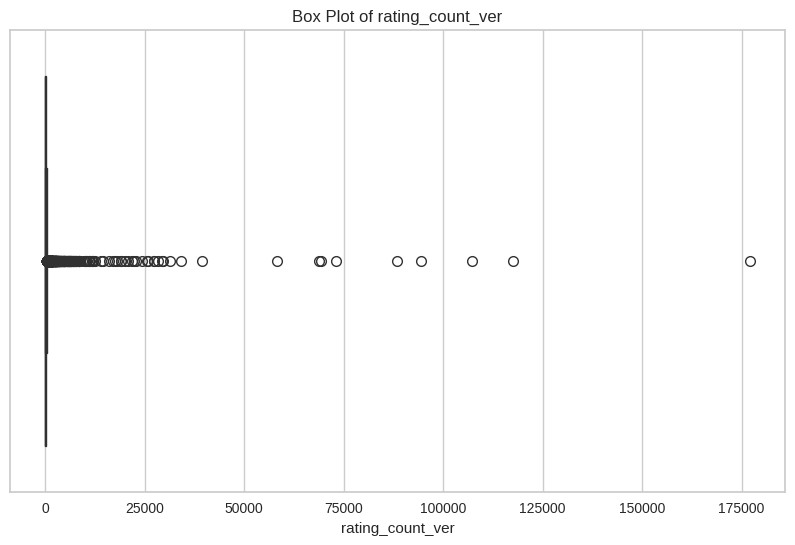

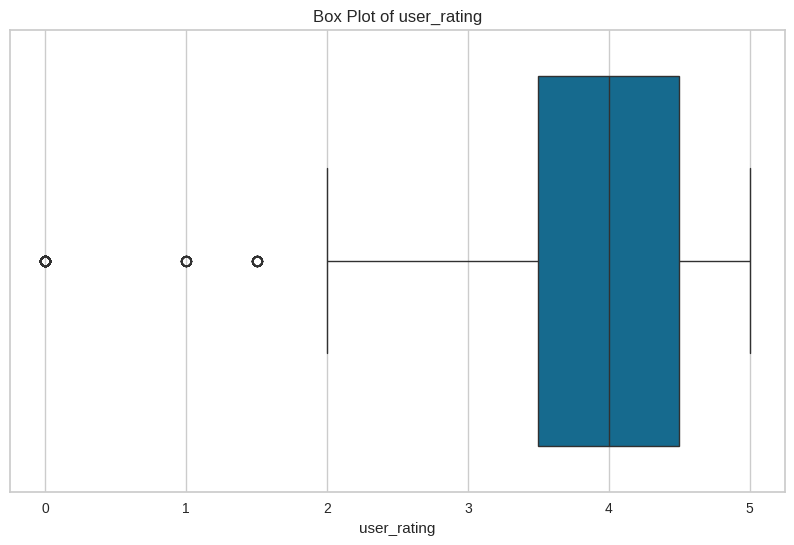

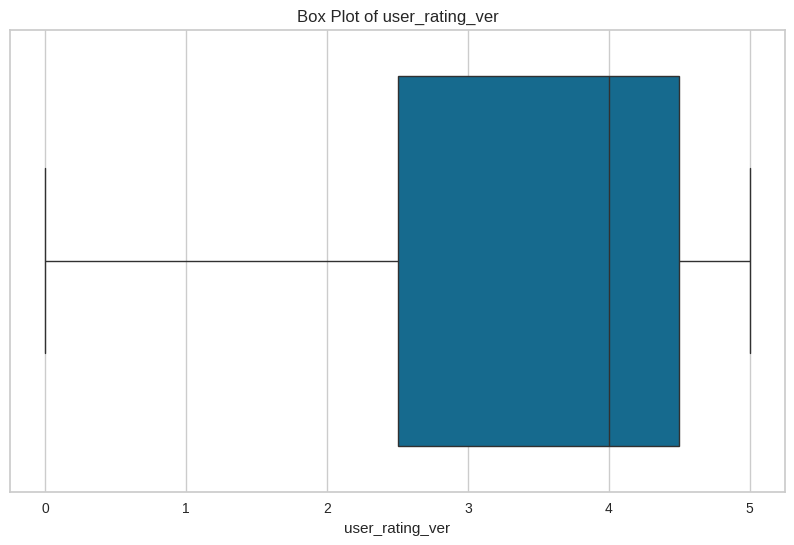

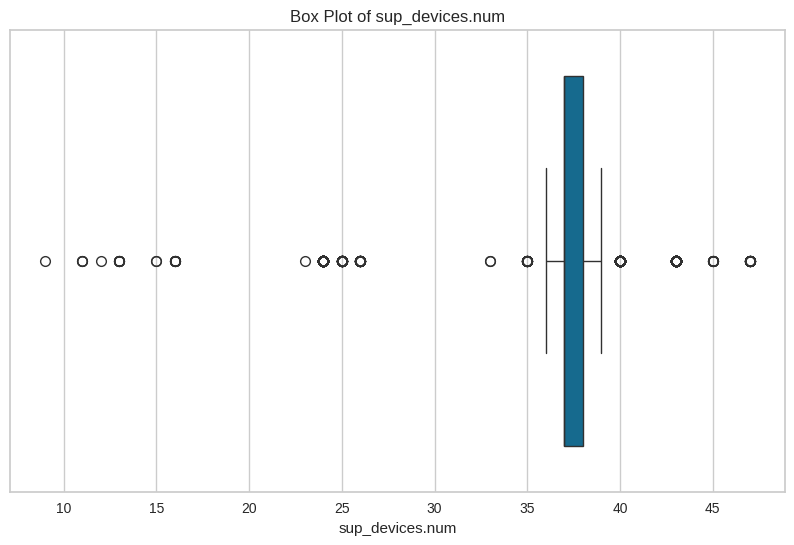

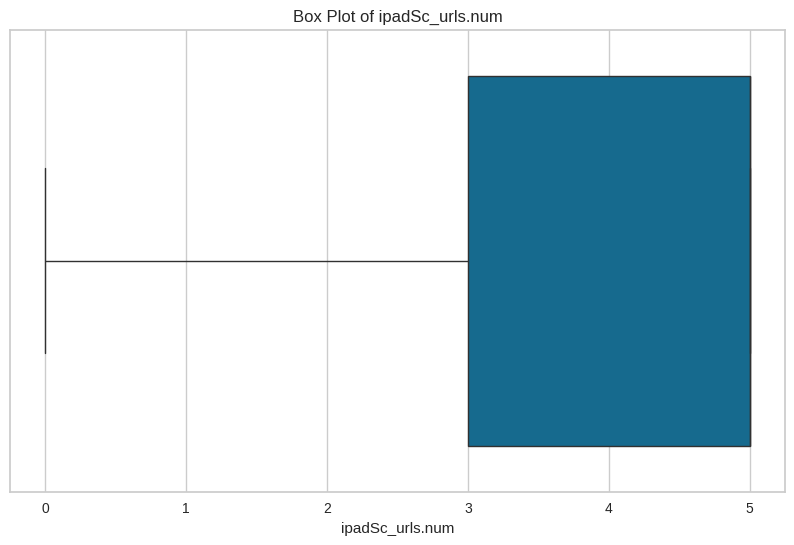

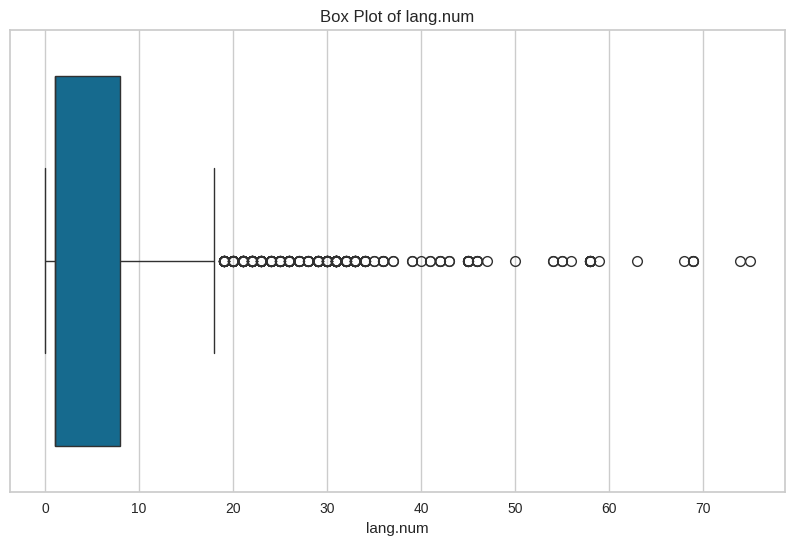

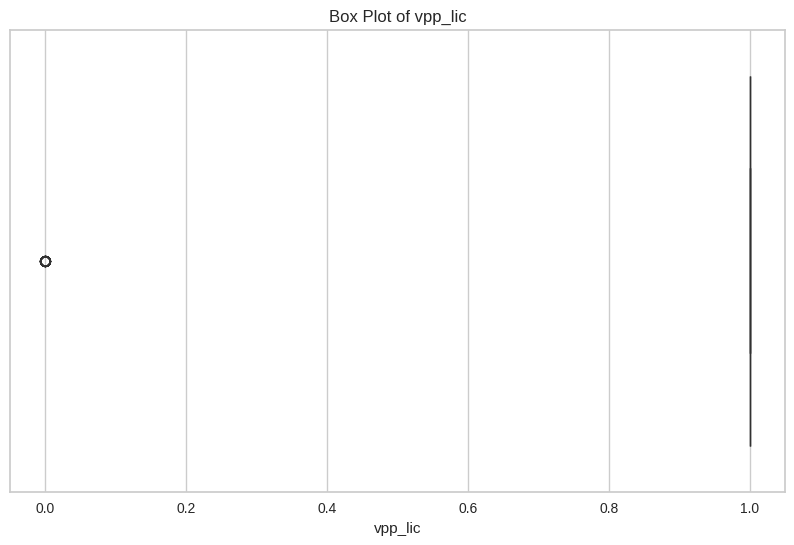

In [ ]:
numeric_features=df_before.select_dtypes(include=['number']).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_before[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

**Insight:**
- Dapat dilihat pada grafik box plot diatas, hampir semua variabel memiliki cukup banyak outlier.
- Variabel yang tidak memiliki outlier diantaranya adalah unnamed, id, user_rating_ver dan ipadSc_urls.num.

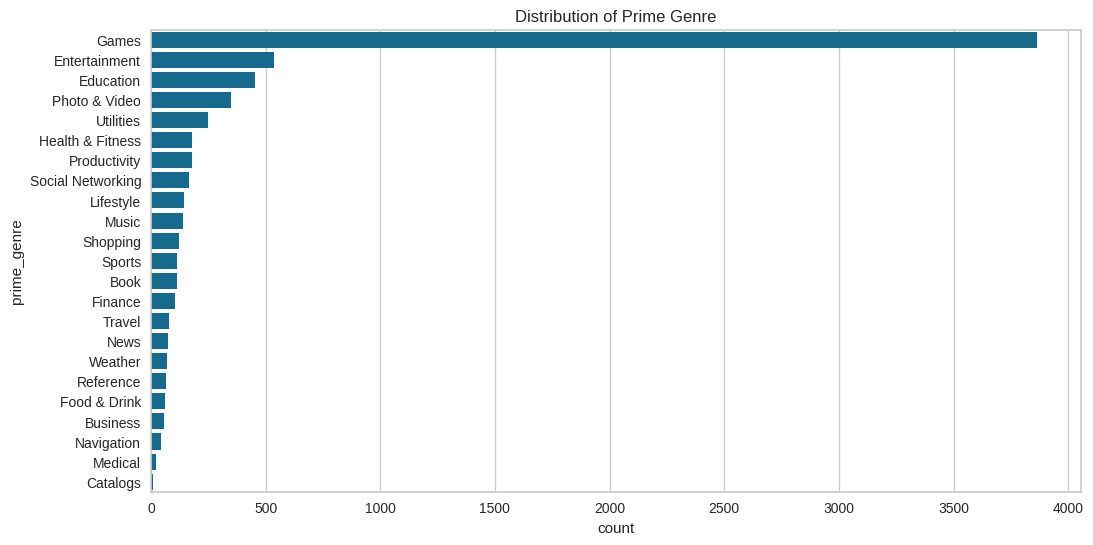

In [ ]:
# Visualisasi kolom kategorikal
plt.figure(figsize=(12, 6))
sns.countplot(y="prime_genre", data=df_before, order=df_before['prime_genre'].value_counts().index)
plt.title("Distribution of Prime Genre")
plt.show()

**Insight:**
- Genre atau jenis aplikasi dalam dataset ini didominasi oleh games lalu dilanjutkan dengan kategori entertaiment, dengan jarak yang cukup jauh.

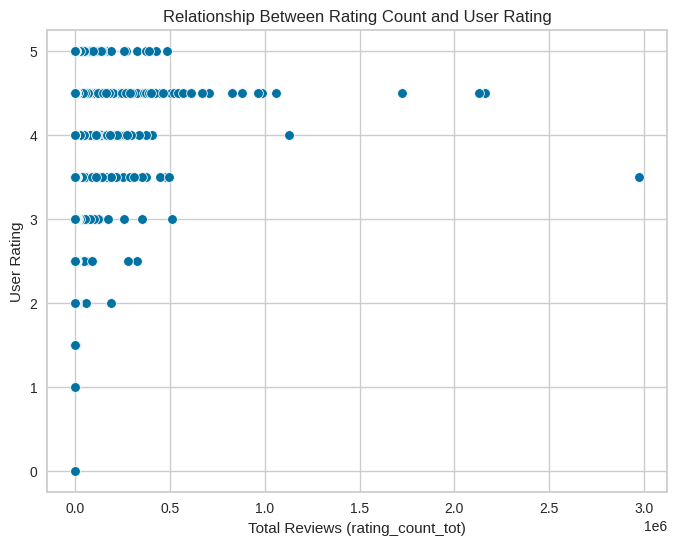

In [ ]:
# Scatter plot antara rating_count_tot dan user_rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating_count_tot', y='user_rating', data=df_before)
plt.title("Relationship Between Rating Count and User Rating")
plt.xlabel("Total Reviews (rating_count_tot)")
plt.ylabel("User Rating")
plt.show()

**Insight:**
Scatter plot menunjukkan pola konsentrasi horizontal di bagian rating 4-5 untuk aplikasi populer dengan ulasan banyak. Aplikasi dengan sedikit ulasan memiliki distribusi rating yang lebih acak dan bervariasi. Secara umum, ada korelasi positif lemah antara banyaknya ulasan dengan stabilitas rating tinggi.

**Kesimpulan:**
- Dataset tidak memiliki nilai null dan tidak memiliki nilai duplikat.
- Beberapa kolom nampaknya tidak diperlukan untuk pembentukan model machine learning karena dirasa tidak relevan. Kolom - kolom tersebut adalah 'sup_devices.num', 'ipadSc_urls.num', 'vpp_lic', 'currency', 'ver', 'size_bytes', 'lang.num', 'track_name', dan 'unamed'.
- Ada keambiguitasan antara rating dan jumlah review (rating_count dan rating_count_ver) karena ada nilai rating tinggi tapi review sedikit, juga rating rendah tapi review banyak.
- Untuk mengatasi outlier, akan dicoba menggunakan transformasi log.

Itu dia daftar beberapa hal yang akan dikerjakan di data preprocessing

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Menghapus kolom

In [ ]:
app_id = df_before['id']
df_before.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [ ]:
# kolom yang ingin dihapus
columns_to_drop = ['sup_devices.num', 'ipadSc_urls.num', 'vpp_lic', 'currency', 'ver', 'lang.num', 'id', 'track_name']

# Hapus kolom dari dataset
df_before.drop(columns=columns_to_drop, inplace=True)
df_before.drop(df_before.columns[0], axis=1, inplace=True)

df_before.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre
0,100788224,3.99,21292,26,4.0,4.5,4+,Games
1,158578688,0.00,161065,26,4.0,3.5,4+,Productivity
2,100524032,0.00,188583,2822,3.5,4.5,4+,Weather
3,128512000,0.00,262241,649,4.0,4.5,12+,Shopping
4,92774400,0.00,985920,5320,4.5,5.0,4+,Reference


## Normalisasi

In [ ]:
# Menyatukan rating berdasarkan jumlah rating agar nilai lebih kredibel
C1 = df_before['user_rating'].mean()
m1 = df_before['rating_count_tot'].median()

def weighted_rating_tot(x1, m=m1, C=C1):
    v1 = x1['rating_count_tot']
    R1 = x1['user_rating']
    return (v1 / (v1 + m1) * R1) + (m1 / (v1 + m1) * C1)

C2 = df_before['user_rating_ver'].mean()
m2 = df_before['rating_count_ver'].median()

def weighted_rating_ver(x2, m=m2, C=C2):
    v2 = x2['rating_count_ver']
    R2 = x2['user_rating_ver']
    return (v2 / (v2 + m2) * R2) + (m2 / (v2 + m2) * C2)

df_before['user_rating'] = df_before.apply(weighted_rating_tot, axis=1)
df_before['user_rating_ver'] = df_before.apply(weighted_rating_ver, axis=1)


In [ ]:
# Membuat skema normalisasi untuk nilai numerik
scalers = {}

# Kolom yang dinormalisasi
columns_to_scale = ['size_bytes','price','user_rating','user_rating_ver']

# Melakukan normalisasi dan menyimpan scaler untuk setiap kolom
for col in columns_to_scale:
    scaler = MinMaxScaler()
    df_before[col] = scaler.fit_transform(df_before[[col]])
    scalers[col] = scaler


In [ ]:
df_before.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre
0,0.024892,0.0133,21292,26,0.689093,0.719330,4+,Games
1,0.039248,0.0000,161065,26,0.690853,0.582049,4+,Productivity
2,0.024826,0.0000,188583,2822,0.536558,0.868090,4+,Weather
3,0.031779,0.0000,262241,649,0.690957,0.859660,12+,Shopping
4,0.022901,0.0000,985920,5320,0.845613,0.998114,4+,Reference


In [ ]:
# Menghapus kolom jumlah rating
columns_to_drop = ['rating_count_tot', 'rating_count_ver']
df_before.drop(columns=columns_to_drop, inplace=True)

## Penanganan Outliers

In [ ]:
# Menentukan nilai kuartil untuk filter outliers
numeric_features=df_before.select_dtypes(include=['number']).columns

Q1 = df_before[numeric_features].quantile(0.25)
Q3 = df_before[numeric_features].quantile(0.75)
IQR = Q3 - Q1
IQR

,0
size_bytes,0.033538
price,0.006634
user_rating,0.222349
user_rating_ver,0.235219


In [ ]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df_before[numeric_features] < (Q1 - 1.5 * IQR)) | (df_before[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df_before.loc[condition, numeric_features]

# Memilih kolom kategorikal berdasarkan kondisi yang sama
categorical_features = df_before.select_dtypes(include=['object']).columns
df_filtered_categorical = df_before.loc[condition, categorical_features]

# Menggabungkan kolom kategorikal di sebelah kiri dan kolom numerik di sebelah kanan
filtered_id = app_id[condition]
df_before = pd.concat([df_filtered_categorical, df_filtered_numeric], axis=1).reset_index(drop=True)

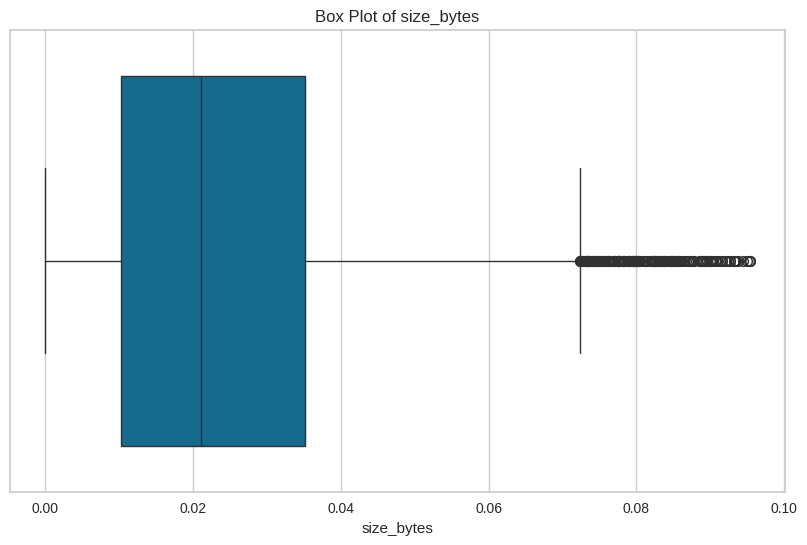

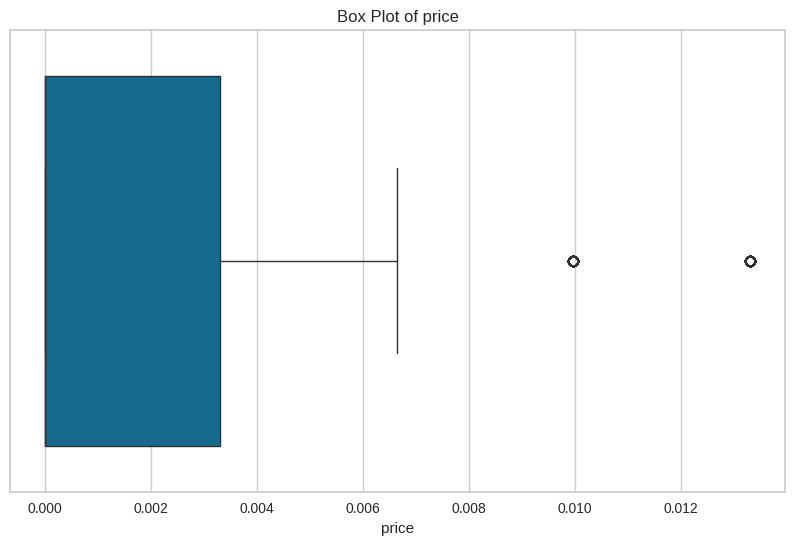

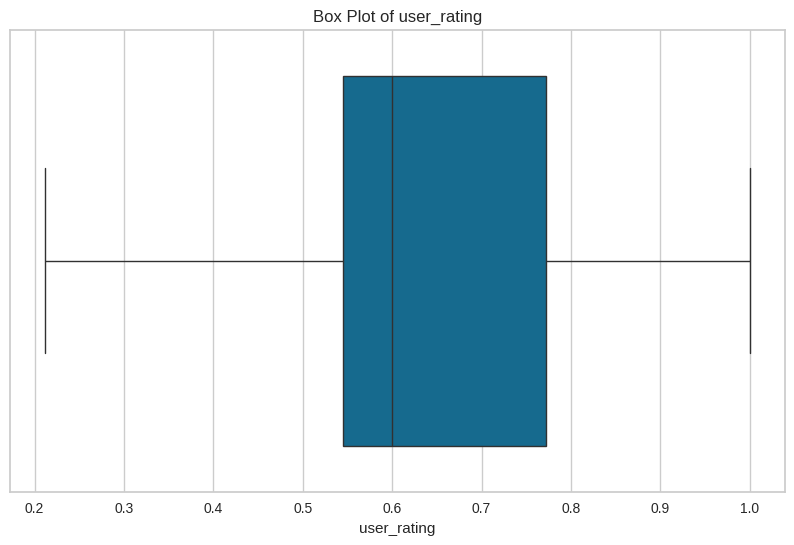

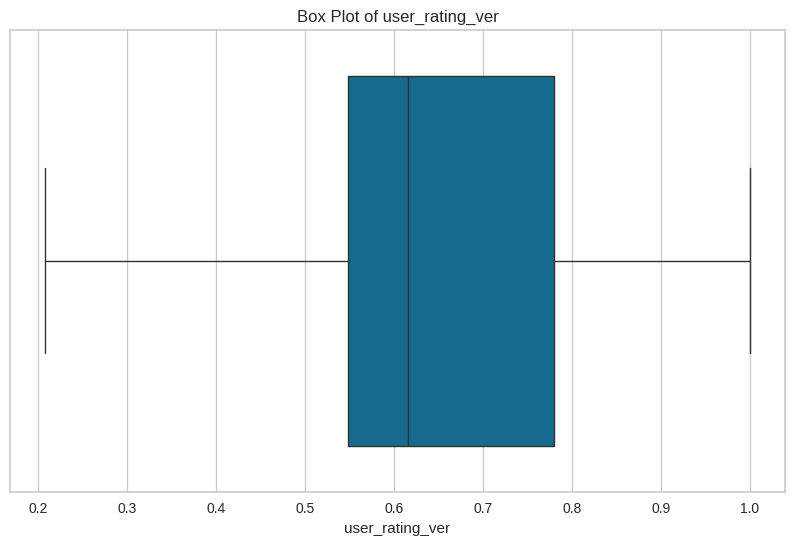

In [ ]:
# Cek outliers
numeric_features=df_before.select_dtypes(include=['number']).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_before[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
df_before

,cont_rating,prime_genre,size_bytes,price,user_rating,user_rating_ver
0,4+,Games,0.024892,0.013300,0.689093,0.719330
1,4+,Productivity,0.039248,0.000000,0.690853,0.582049
2,4+,Weather,0.024826,0.000000,0.536558,0.868090
3,12+,Shopping,0.031779,0.000000,0.690957,0.859660
4,4+,Reference,0.022901,0.000000,0.845613,0.998114
...,...,...,...,...,...,...
5857,4+,Games,0.031315,0.000000,0.641524,0.795014
5858,4+,Games,0.029853,0.000000,0.572226,0.730754
5859,9+,Utilities,0.027509,0.006634,0.559204,0.548220
5860,12+,Games,0.024009,0.000000,0.611295,0.735843


## Encoding

In [ ]:
# Melakukan count encoding untuk kolom "prime_genre" karena jumlah fitur yang sangat banyak (21 genre)
nominal_col = ['prime_genre']

# Count Encoding untuk setiap kolom dan simpan mapping
encoded_genre = []
count_feature_names = []

for col in nominal_col:

    # Hitung jumlah kemunculan setiap kategori
    count_map = df_before[col].value_counts().to_dict()

    # Mapping ke dalam DataFrame
    df_before[col + '_count'] = df_before[col].map(count_map)

    # Simpan nama fitur untuk Count Encoding
    count_feature_names.append(col + '_count')

    # Convert kolom menjadi array dan tambahkan ke list
    encoded_genre.append(df_before[col + '_count'].values)

# Menggabungkan array menjadi array 2D
encoded_genre = np.column_stack(encoded_genre)

In [ ]:
# Map untuk kolom "prime_genre" yang diperlukan untuk analisis clustering nanti
count_map

{'Games': 3023,
 'Entertainment': 477,
 'Education': 343,
 'Photo & Video': 314,
 'Utilities': 223,
 'Social Networking': 160,
 'Health & Fitness': 156,
 'Lifestyle': 132,
 'Shopping': 122,
 'Productivity': 116,
 'Sports': 104,
 'Finance': 100,
 'Music': 98,
 'Book': 94,
 'News': 74,
 'Travel': 71,
 'Weather': 69,
 'Food & Drink': 52,
 'Reference': 45,
 'Navigation': 35,
 'Business': 34,
 'Medical': 11,
 'Catalogs': 9}

In [ ]:
# Melakukan ordinal encoding
ordinal_col = ['cont_rating']
# Mapping untuk setiap kolom ordinal
contrating_mapping = ['4+', '9+', '12+', '17+']

# Menginisialisasi OrdinalEncoder untuk setiap kolom
encoder= OrdinalEncoder(categories=[contrating_mapping])

# Menerapkan Ordinal Encoding ke kolom yang sesuai
encoded_ordinal = encoder.fit_transform(df_before[['cont_rating']])
encoded_categorical = np.hstack((encoded_genre, encoded_ordinal))

In [ ]:
# Menormalisasi kolom numerik ke dalam array 2D
size_bytes_val = df_before['size_bytes'].values.reshape(-1, 1)
price_val = df_before['price'].values.reshape(-1, 1)
user_rating_val = df_before['user_rating'].values.reshape(-1, 1)
user_rating_ver_val = df_before['user_rating_ver'].values.reshape(-1, 1)

# Menggabungkan kolom numerik
encoded_numerical = np.column_stack((size_bytes_val, price_val, user_rating_val, user_rating_ver_val))

# Menggabungkan dengan data kategorikal yang sudah dienkode
merge_data = np.hstack((encoded_categorical, encoded_numerical))

# Mendapatkan nama kolom
ordinal_feature_names = ordinal_col
numerical_feature_names = ['size_bytes', 'price', 'user_rating', 'user_rating_ver']

# Menggabungkan semua nama kolom
final_column_names = count_feature_names + ordinal_feature_names + numerical_feature_names

# Mengonversi hasil penggabungan ke dalam DataFrame beserta nama kolom
df_encoded = pd.DataFrame(merge_data, columns=final_column_names)

df_encoded.head()

,prime_genre_count,cont_rating,size_bytes,price,user_rating,user_rating_ver
0,3023.0,0.0,0.024892,0.0133,0.689093,0.719330
1,116.0,0.0,0.039248,0.0000,0.690853,0.582049
2,69.0,0.0,0.024826,0.0000,0.536558,0.868090
3,122.0,2.0,0.031779,0.0000,0.690957,0.859660
4,45.0,0.0,0.022901,0.0000,0.845613,0.998114


In [ ]:
#Mengembalikan nilai normalisasi ke asli yang sudah di filter outliers sebelumnya, untuk menyimpan nilai asli

def inverse_transform(df_before, scalers, columns_to_scale):
    # Menyalin DataFrame untuk menghindari perubahan langsung pada df asli
    df_real_data = df_before.copy()

    # Melakukan inverse transform
    for col in columns_to_scale:
        if col in scalers:
            df_real_data[col] = scalers[col].inverse_transform(df_before[[col]])
        else:
            print(f"Scaler untuk kolom '{col}' tidak ditemukan.")

    return df_real_data

# Menjalankan fungsi inverse_transform dan simpan di variabel "df_real_data"
df_real_data = inverse_transform(df_before, scalers, columns_to_scale)
df_real_data.head()

,cont_rating,prime_genre,size_bytes,price,user_rating,user_rating_ver,prime_genre_count
0,4+,Games,100788224.0,3.99,3.993428,3.914945,3023
1,4+,Productivity,158578688.0,0.00,3.999121,3.384332,116
2,4+,Weather,100524032.0,0.00,3.500043,4.489923,69
3,12+,Shopping,128512000.0,0.00,3.999459,4.457340,122
4,4+,Reference,92774400.0,0.00,4.499704,4.992482,45


## Binning

Batas bin: [2.44743784 3.29968559 4.14938425 4.99908291]


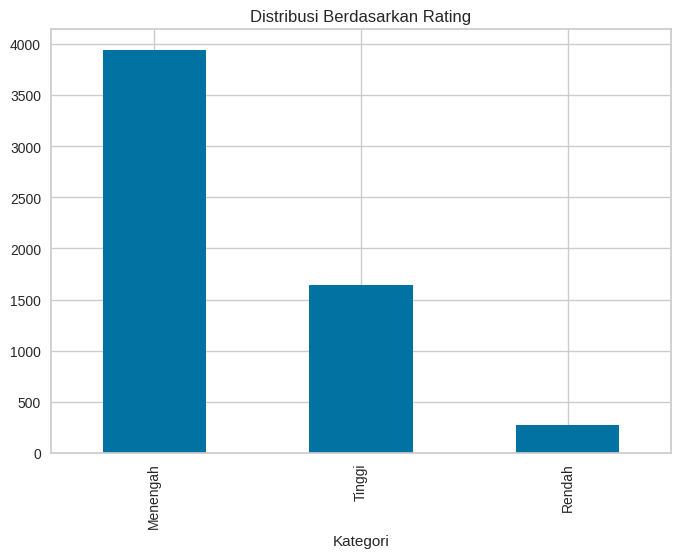

In [ ]:
# Binning berdasarkan rating
user_rating = df_real_data['user_rating']

# Binning
bins, bin_edges = pd.cut(user_rating, bins=3, labels=['Rendah', 'Menengah', 'Tinggi'], retbins=True)

print("Batas bin:", bin_edges)

# Visualisasi
df_real_data['rating_category'] = bins
df_real_data['rating_category'].value_counts().plot(kind='bar')
plt.title('Distribusi Berdasarkan Rating')
plt.xlabel('Kategori')
plt.show()

Batas bin: [-0.00399  0.9975   1.995    2.9925   3.99   ]


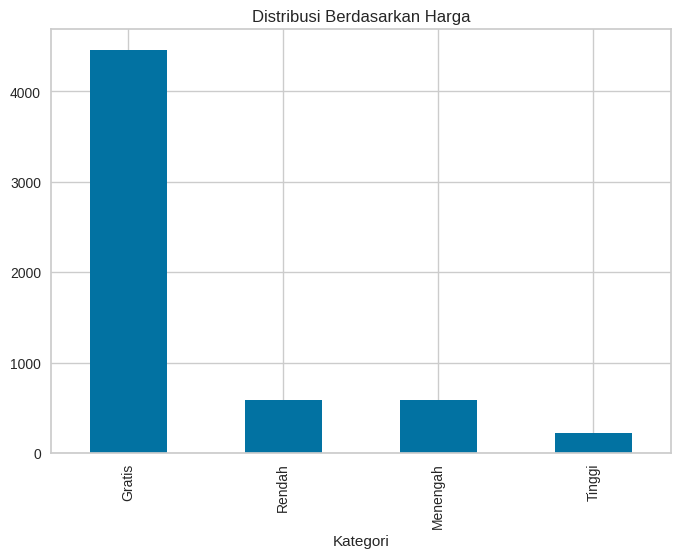

In [ ]:
# Binning berdasarkan harga
price = df_real_data['price']

bins, bin_edges = pd.cut(price, bins=4, labels=['Gratis', 'Rendah', 'Menengah', 'Tinggi'], retbins=True)

print("Batas bin:", bin_edges)

# Visualisasi
df_real_data['price_category'] = bins
df_real_data['price_category'].value_counts().plot(kind='bar')
plt.title('Distribusi Berdasarkan Harga')
plt.xlabel('Kategori')
plt.show()

Rentang kategori 'Kecil', 'Sedang', 'Besar':
Kecil: 0 to 50 MB
Sedang: 50 to 100 MB
Besar: > 100 MB


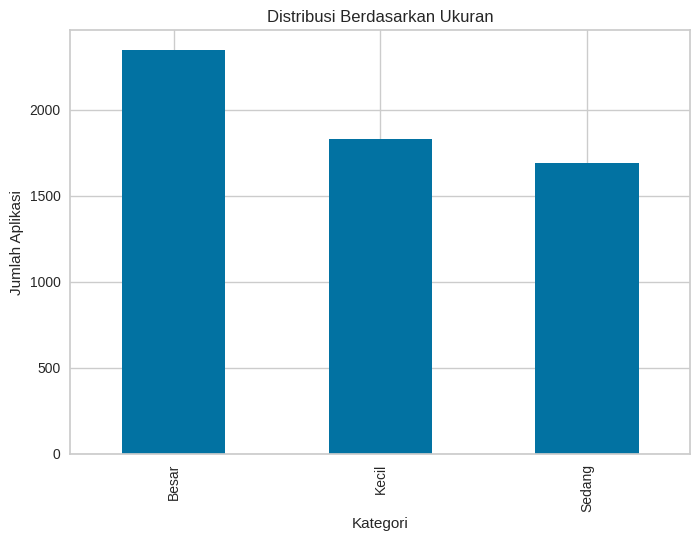

In [ ]:
# Binning berdasarkan ukuran
lower_bound_kecil = 0 * 1024**2  # 0 MB
upper_bound_kecil = 50 * 1024**2  # 50 MB
upper_bound_sedang = 100 * 1024**2  # 100 MB
upper_bound_besar = float('inf')  # Lebih dari 100 MB

# Bins sesuai kategori yang diinginkan
bins = [lower_bound_kecil, upper_bound_kecil, upper_bound_sedang, upper_bound_besar]

# Label kategori yang diinginkan
labels = ['Kecil', 'Sedang', 'Besar']

# Menentukan kategori berdasarkan bins
df_real_data['size_category'] = pd.cut(df_real_data['size_bytes'], bins=bins, labels=labels, right=False)

# Menampilkan rentang kategori
print("Rentang kategori 'Kecil', 'Sedang', 'Besar':")
print("Kecil: 0 to 50 MB")
print("Sedang: 50 to 100 MB")
print("Besar: > 100 MB")

# Visualisasi distribusi kategori ukuran aplikasi
df_real_data['size_category'].value_counts().plot(kind='bar')
plt.title('Distribusi Berdasarkan Ukuran')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Aplikasi')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

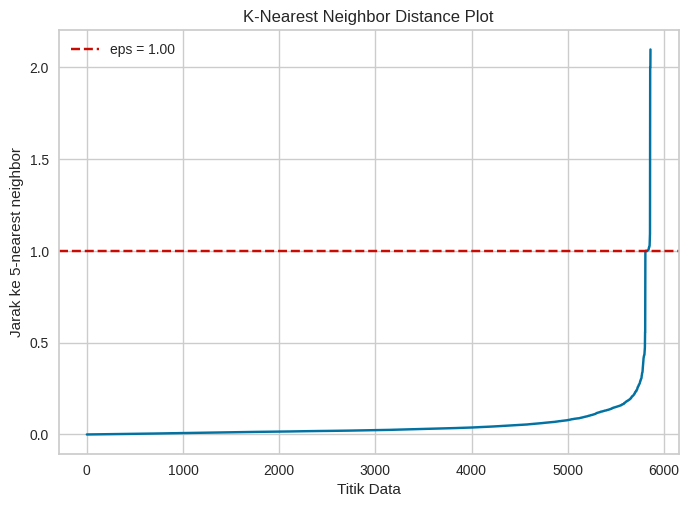

In [ ]:
# Menggunakan KNN untuk mencari jarak tetangga ke-4 (atau ke-5) untuk skema mencari eps yang tepat
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_encoded)
distances, indices = neighbors_fit.kneighbors(df_encoded)
eps = np.sort(distances[:, 4])[-50]

# Plot jarak ke-4 nearest neighbor
plt.plot(np.sort(distances[:, 4]))  # Jarak ke tetangga ke-5
plt.axhline(y=eps, color='r', linestyle='--', label=f'eps = {eps:.2f}')
plt.title('K-Nearest Neighbor Distance Plot')
plt.xlabel('Titik Data')
plt.ylabel('Jarak ke 5-nearest neighbor')
plt.legend()
plt.show()

In [ ]:
# Clustering dengan DBSCAN
dbscan = DBSCAN(eps=1, min_samples=29)
labels = dbscan.fit_predict(df_encoded)

# Menambahkan label cluster ke dataframe
df_encoded['Cluster'] = labels


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Evaluasi menggunakan Silhouette Score
silhouette_avg = silhouette_score(df_encoded, labels)

print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.7961682383780453


Nilai silhoutte sudah cukup tinggi, namun saya rasa masih bisa dioptimalkan lagi dengan melakukan feature selection.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

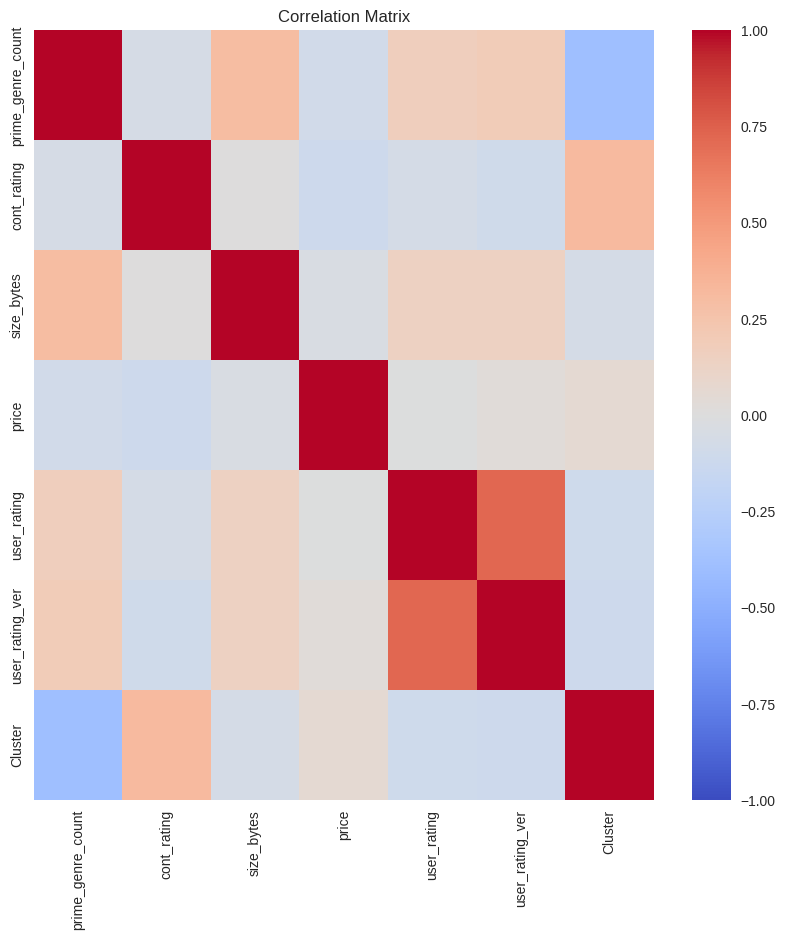

In [ ]:
numeric_after_encoded = df_encoded.select_dtypes(include=['number'])
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(10, 10))
correlation_matrix = numeric_after_encoded.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Dari hasil heatmap korelasi diatas, terlihat bahwa hubungan user_rating dan user_rating_ver memiliki korelasi yang cukup dekat. Oleh karena itu, saya coba menghilangkan salah satu dari kolom tersebut. Mengingat fungsi user_rating_ver yang adalah kolom rating dari versi aplikasi terbaru, maka saya pikir tidak terlalu diperlukan untuk analisis, jadi saya akan menghapus kolom itu.

In [ ]:
# Menggabungkan kolom numerik secara vertikal (column-wise)
encoded_numerical_2 = np.column_stack((size_bytes_val, price_val, user_rating_val))

# Menyimpan scaler untuk setiap kolom yang dinormalisasi
scalers_2 = {}

# Kolom yang dinormalisasi
columns_to_scale_2 = ['size_bytes', 'price', 'user_rating' ]

# Melakukan normalisasi dan menyimpan scaler untuk setiap kolom
for col in columns_to_scale_2:
    scaler_2 = MinMaxScaler()
    df_before[col] = scaler.fit_transform(df_before[[col]])  # Normalisasi
    scalers_2[col] = scaler_2  # Simpan scaler


# Menggabungkan dengan data kategorikal yang sudah dienkode
merge_data = np.hstack((encoded_categorical, encoded_numerical_2))

# Mendapatkan nama kolom numerik
numerical_feature_names_2 = ['size_bytes', 'price', 'user_rating']

# Gabungkan semua nama kolom
final_column_names = count_feature_names + ordinal_feature_names + columns_to_scale_2

# Mengonversi hasil penggabungan ke dalam DataFrame
df_second_encoded = pd.DataFrame(merge_data, columns=final_column_names)

df_second_encoded['app_id'] = app_id

df_second_encoded.head()

,prime_genre_count,cont_rating,size_bytes,price,user_rating,app_id
0,3023.0,0.0,0.024892,0.0133,0.689093,281656475
1,116.0,0.0,0.039248,0.0000,0.690853,281796108
2,69.0,0.0,0.024826,0.0000,0.536558,281940292
3,122.0,2.0,0.031779,0.0000,0.690957,282614216
4,45.0,0.0,0.022901,0.0000,0.845613,282935706


In [ ]:
df_second_encoded = df_second_encoded.drop(columns=['app_id'])
df_second_encoded

,prime_genre_count,cont_rating,size_bytes,price,user_rating
0,3023.0,0.0,0.024892,0.013300,0.689093
1,116.0,0.0,0.039248,0.000000,0.690853
2,69.0,0.0,0.024826,0.000000,0.536558
3,122.0,2.0,0.031779,0.000000,0.690957
4,45.0,0.0,0.022901,0.000000,0.845613
...,...,...,...,...,...
5857,3023.0,0.0,0.031315,0.000000,0.641524
5858,3023.0,0.0,0.029853,0.000000,0.572226
5859,223.0,1.0,0.027509,0.006634,0.559204
5860,3023.0,2.0,0.024009,0.000000,0.611295


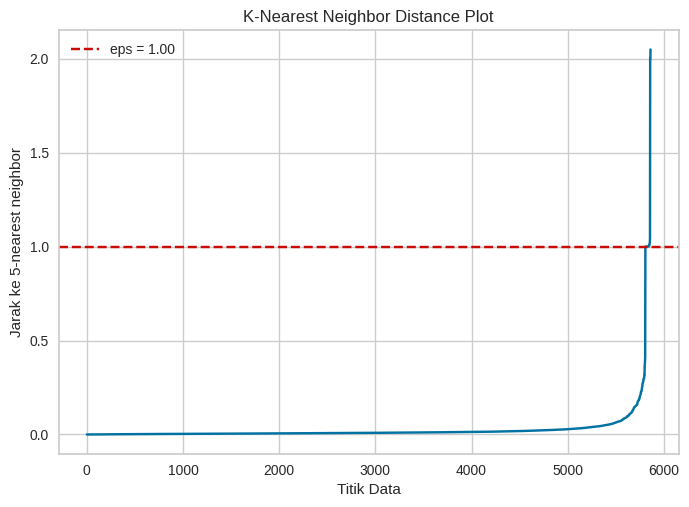

In [ ]:
# Menggunakan KNN untuk mencari jarak tetangga ke-4 (atau ke-5) untuk skema mencari eps yang tepat
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_second_encoded)
distances, indices = neighbors_fit.kneighbors(df_second_encoded)
eps = np.sort(distances[:, 4])[-50]

# Plot jarak ke-4 nearest neighbor
plt.plot(np.sort(distances[:, 4]))  # Jarak ke tetangga ke-5
plt.axhline(y=eps, color='r', linestyle='--', label=f'eps = {eps:.2f}')
plt.title('K-Nearest Neighbor Distance Plot')
plt.xlabel('Titik Data')
plt.ylabel('Jarak ke 5-nearest neighbor')
plt.legend()
plt.show()

In [ ]:
# Clustering dengan DBSCAN
dbscan = DBSCAN(eps=1, min_samples=28)
labels = dbscan.fit_predict(df_second_encoded)

# Menambahkan label cluster ke dataframe
df_second_encoded['Cluster'] = labels


In [ ]:
# Evaluasi menggunakan Silhouette Score (jika lebih dari 1 cluster ditemukan)
silhouette_avg = silhouette_score(df_second_encoded, labels)

print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.8267322562119508


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

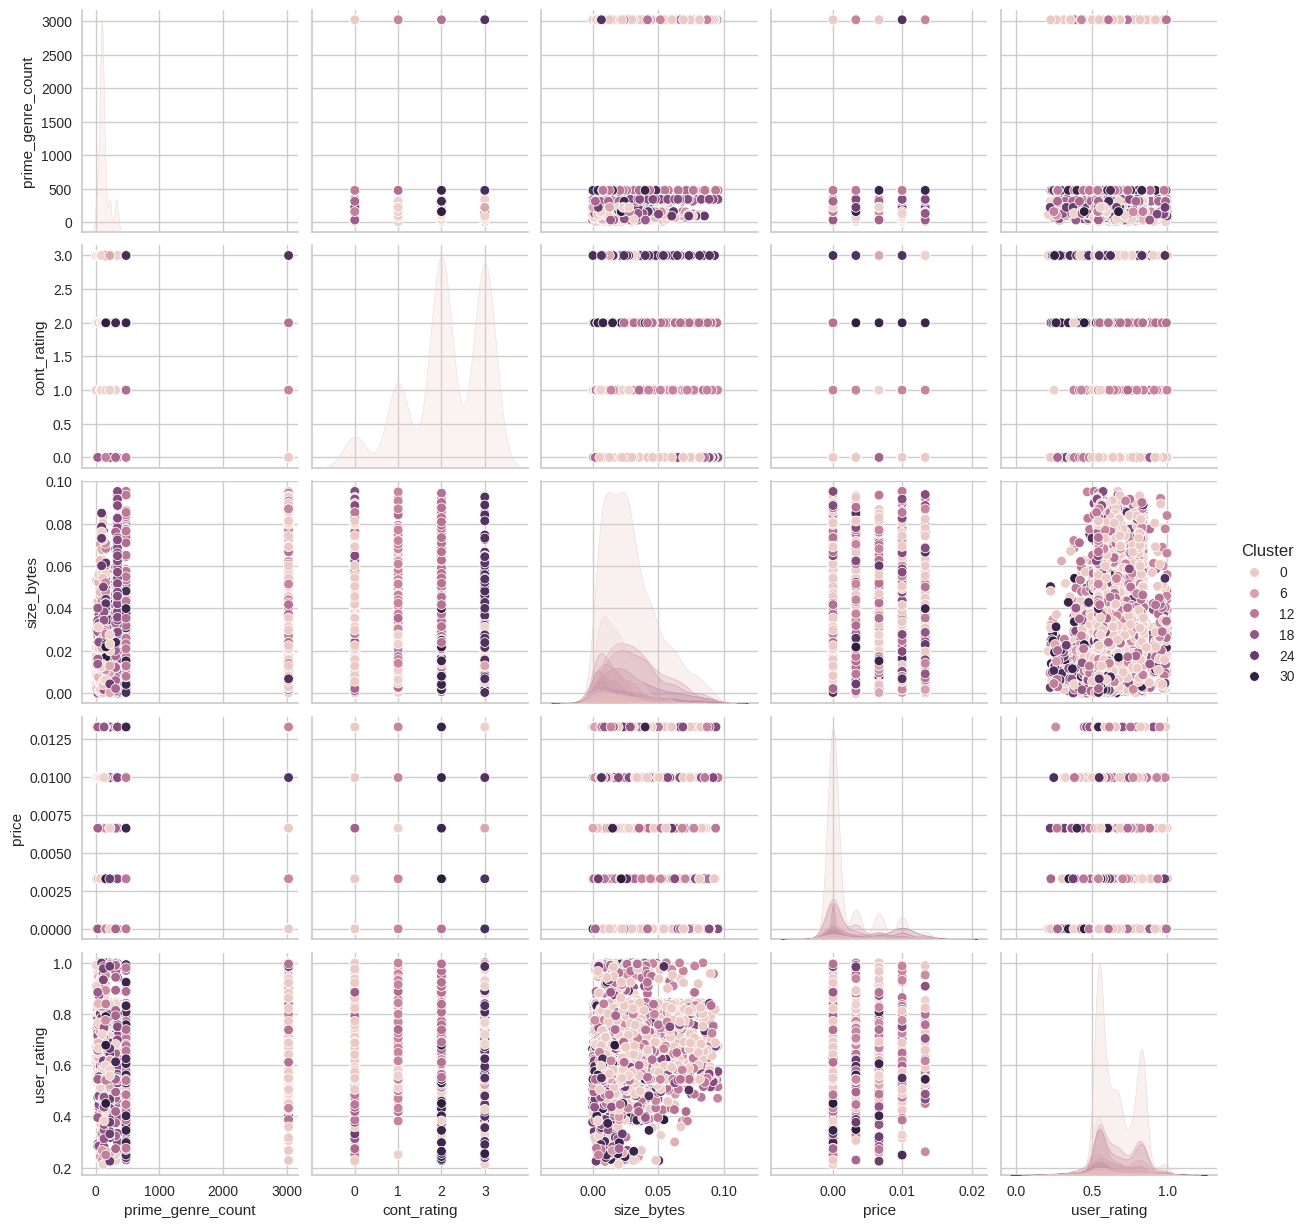

In [ ]:
sns.pairplot(df_second_encoded, hue='Cluster')
plt.show()

Dari hasil visualisasi hasil clustering diatas, penyebaran data dan korelasi berdasarkan fitur. Warnanya menunjukkan cluster

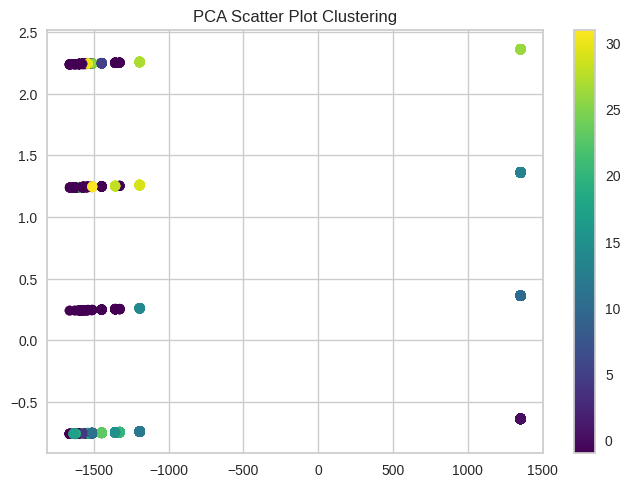

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_second_encoded.drop(['Cluster'], axis=1))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_second_encoded['Cluster'], cmap='viridis')
plt.colorbar()
plt.title('PCA Scatter Plot Clustering')
plt.show()

Dari hasil visualisasi dengan plot PCA diatas, terlihat ada sebagian besar data dibagian kiri menunjukkan data yang telah di cluster berdasarkan warnanya. Sementara ada data yang terpisah jauh di sebelah kanan, menunjukkan outliers yang terdeteksi oleh model clustering.

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Perbandingan nilai silhoutte antara proses clustering sebelum feature selection dan sesudah feature selection memberikan pengaruh yang cukup yakni sekitar 0.038 % kenaikan.

- Sebelum feature selection = 0.7961682383780453
- Setelah feature selection = 0.8267322562119508

In [ ]:
def inverse_transform(df_second_encoded, scalers, columns_to_scale_2, categorical_cols):
    # Membuat salinan DataFrame untuk mengembalikan nilai asli
    df_restored = df_second_encoded.copy()

    # Melakukan inverse transform untuk setiap kolom numerik
    for col in columns_to_scale_2:
        if col in scalers:

            # Menggunakan scaler yang telah disimpan untuk mengembalikan ke skala asli
            df_restored[col] = scalers[col].inverse_transform(df_second_encoded[[col]])
        else:
            print(f"Scaler untuk kolom '{col}' tidak ditemukan.")

    # Menggabungkan kolom kategori (pastikan tidak hilang setelah inverse transform)
    for col in categorical_cols:
        df_restored[col] = df_second_encoded[col]

    # Menyatukan dengan kolom cluster
    df_restored['Cluster'] = df_second_encoded['Cluster']

    return df_restored

# Analisis karakteristik cluster
def analyze_clusters(df_second_encoded, categorical_cols, columns_to_scale_2):
    unique_clusters = sorted(df_second_encoded['Cluster'].unique())
    print("Analisis Karakteristik Setiap Cluster:")

    for cluster_id in unique_clusters:
        # Mengambil data untuk cluster saat ini (termasuk noise)
        cluster_data = df_second_encoded[df_second_encoded['Cluster'] == cluster_id]

        if cluster_id == -1:
            print("\nCluster Noise (-1):")
        else:
            print(f"\nCluster {cluster_id}:")

        print(f"Jumlah data: {len(cluster_data)}")

        categorical_cols = ['prime_genre_count','cont_rating']

        # Analisis untuk kolom kategorikal
        for i in categorical_cols:
            mode_value = cluster_data[i].mode()[0] if not cluster_data[i].mode().empty else "N/A"
            print(f"Modus {i}: {mode_value}")

        # Analisis untuk kolom numerik
        for i in columns_to_scale_2:
            mean_value = cluster_data[i].mean()
            print(f"Rata-rata {i}: {mean_value:.2f}")

            max_value = cluster_data[i].max()
            print(f"Nilai Max {i}: {max_value:.2f}")

            min_value = cluster_data[i].min()
            print(f"Nilai Min {i}: {min_value:.2f}")

categorical_cols = ['prime_genre_count', 'cont_rating']

columns_to_scale_2 = ['size_bytes', 'price', 'user_rating' ]

# Lakukan inverse transform sebelum analisis cluster
df_restored = inverse_transform(df_second_encoded, scalers, columns_to_scale_2, categorical_cols)

# Menjalankan fungsi analisis cluster dengan data yang sudah dikembalikan ke nilai asli
analyze_clusters(df_restored, categorical_cols, columns_to_scale_2,)

Analisis Karakteristik Setiap Cluster:

Cluster Noise (-1):
Jumlah data: 460
Modus prime_genre_count: 94.0
Modus cont_rating: 2.0
Rata-rata size_bytes: 73358026.32
Nilai Max size_bytes: 307137536.00
Nilai Min size_bytes: 2147328.00
Rata-rata price: 0.60
Nilai Max price: 3.99
Nilai Min price: 0.00
Rata-rata user_rating: 3.76
Nilai Max user_rating: 4.97
Nilai Min user_rating: 2.45

Cluster 0:
Jumlah data: 1834
Modus prime_genre_count: 3023.0
Modus cont_rating: 0.0
Rata-rata size_bytes: 119043916.02
Nilai Max size_bytes: 384385024.00
Nilai Min size_bytes: 1126400.00
Rata-rata price: 0.60
Nilai Max price: 3.99
Nilai Min price: 0.00
Rata-rata user_rating: 3.92
Nilai Max user_rating: 5.00
Nilai Min user_rating: 2.50

Cluster 1:
Jumlah data: 102
Modus prime_genre_count: 116.0
Modus cont_rating: 0.0
Rata-rata size_bytes: 84197195.29
Nilai Max size_bytes: 336831488.00
Nilai Min size_bytes: 761856.00
Rata-rata price: 0.98
Nilai Max price: 3.99
Nilai Min price: 0.00
Rata-rata user_rating: 3.97
Ni

Hasil interpretasi:

1.	Cluster 0:  Terdiri dari 1834 aplikasi, mayoritas adalah aplikasi games berukuran besar (119 MB), harga murah (0.6 USD), dan memiliki rating menengah (3.92) yang diperuntukan untuk pengguna umum (usia 4+).

2.	Cluster 1: Terdiri dari 102 aplikasi, mayoritas adalah aplikasi produktivitas berukuran sedang (84 MB), harga murah (0.98 USD), dan memiliki rating menengah (3.97) yang diperuntukan untuk pengguna umum (usia 4+).

3.	Cluster 2: Terdiri dari 63 aplikasi, mayoritas adalah aplikasi cuaca berukuran sedang (63 MB), harga menengah (1.26 USD), dan memiliki rating menengah (3.84) yang diperuntukkan untuk pengguna umum (usia 4+).

4.	Cluster 3: Terdiri dari 28 aplikasi, mayoritas adalah aplikasi referensi berukuran sedang (75 MB), harga menengah (1.49 USD), dan memiliki rating menengah (4.08) yang diperuntukkan untuk pengguna umum (usia 4+).

5.	Cluster 4: Terdiri dari 71 aplikasi, mayoritas adalah aplikasi keuangan berukuran sedang (80 MB), harga murah (0.45 USD), dan memiliki rating menengah (3.70) yang diperuntukkan untuk pengguna umum (usia 4+).

6.	Cluster 5: Terdiri dari 42 aplikasi, mayoritas adalah aplikasi utilitas berukuran sedang (62 MB), harga murah (0.97 USD), dan memiliki rating menengah (3.72) yang diperuntukkan untuk pengguna 17+.

7.	Cluster 6: Terdiri dari 54 aplikasi, mayoritas adalah aplikasi perjalanan berukuran sedang (80 MB), harga murah (0.39 USD), dan memiliki rating menengah (3.67) yang diperuntukkan untuk pengguna umum (usia 4+).

8.	Cluster 7: Terdiri dari 66 aplikasi, mayoritas adalah aplikasi olahraga berukuran sedang (65 MB), harga murah (0.65 USD), dan memiliki rating menengah (3.50) yang diperuntukkan untuk pengguna umum (usia 4+).

9.	Cluster 8: Terdiri dari 64 aplikasi, mayoritas adalah aplikasi musik berukuran sedang (64 MB), harga menengah (1.28 USD), dan memiliki rating menengah (3.93) yang diperuntukkan untuk pengguna umum (usia 4+).

10.	Cluster 9: Terdiri dari 122 aplikasi, mayoritas adalah aplikasi kesehatan dan kebugaran berukuran sedang (82 MB), harga menengah (1.36 USD), dan memiliki rating menengah (3.99) yang diperuntukkan untuk pengguna umum (usia 4+).

11.	Cluster 10: Terdiri dari 568 aplikasi, mayoritas adalah aplikasi games berukuran besar (138 MB), harga murah (0.80 USD), dan memiliki rating menengah (3.94) yang diperuntukkan untuk pengguna 9+.

12.	Cluster 11: Terdiri dari 53 aplikasi, mayoritas adalah aplikasi jejaring sosial berukuran sedang (77 MB), harga murah (0.39 USD), dan memiliki rating menengah (3.80) yang diperuntukkan untuk pengguna umum (usia 4+).

13.	Cluster 12: Terdiri dari 242 aplikasi, mayoritas adalah aplikasi hiburan berukuran sedang (84 MB), harga murah (0.86 USD), dan memiliki rating menengah (3.71) yang diperuntukkan untuk pengguna umum (usia 4+).

14.	Cluster 13: Terdiri dari 500 aplikasi, mayoritas adalah aplikasi games berukuran besar (139 MB), harga murah (0.77 USD), dan memiliki rating menengah (3.96) yang diperuntukkan untuk pengguna 12+.

15.	Cluster 14: Terdiri dari 40 aplikasi, mayoritas adalah aplikasi hiburan berukuran sedang (84 MB), harga murah (0.84 USD), dan memiliki rating menengah (3.68) yang diperuntukkan untuk pengguna 9+.

16.	Cluster 15: Terdiri dari 255 aplikasi, mayoritas adalah aplikasi foto dan video berukuran sedang (65 MB), harga menengah (1.11 USD), dan memiliki rating menengah (3.96) yang diperuntukkan untuk pengguna umum (usia 4+).

17.	Cluster 16: Terdiri dari 29 aplikasi, mayoritas adalah aplikasi navigasi berukuran sedang (60 MB), harga menengah (1.03 USD), dan memiliki rating menengah (3.70) yang diperuntukkan untuk pengguna umum (usia 4+).

18.	Cluster 17: Terdiri dari 33 aplikasi, mayoritas adalah aplikasi bisnis berukuran sedang (70 MB), harga menengah (1.06 USD), dan memiliki rating menengah (3.81) yang diperuntukkan untuk pengguna umum (usia 4+).

19.	Cluster 18: Terdiri dari 77 aplikasi, mayoritas adalah aplikasi gaya hidup berukuran sedang (63 MB), harga murah (0.85 USD), dan memiliki rating menengah (3.72) yang diperuntukkan untuk pengguna umum (usia 4+).

20.	Cluster 19: Terdiri dari 37 aplikasi, mayoritas adalah aplikasi makanan dan minuman berukuran sedang (64 MB), harga murah (0.32 USD), dan memiliki rating menengah (3.70) yang diperuntukkan untuk pengguna umum (usia 4+).

21.	Cluster 20: Terdiri dari 328 aplikasi, mayoritas adalah aplikasi edukasi berukuran besar (129 MB), harga tinggi (1.83 USD), dan memiliki rating menengah (3.74) yang diperuntukkan untuk pengguna umum (usia 4+).

22.	Cluster 21: Terdiri dari 82 aplikasi, mayoritas adalah aplikasi belanja berukuran sedang (85 MB), gratis (0.02 USD), dan memiliki rating menengah (3.90) yang diperuntukkan untuk pengguna umum (usia 4+).

23.	Cluster 22: Terdiri dari 28 aplikasi, mayoritas adalah aplikasi berita berukuran sedang (69 MB), harga murah (0.32 USD), dan memiliki rating menengah (3.70) yang diperuntukkan untuk pengguna 12+.

24.	Cluster 23: Terdiri dari 147 aplikasi, mayoritas adalah aplikasi utilitas berukuran kecil (52 MB), harga menengah (1.06 USD), dan memiliki rating menengah (3.75) yang diperuntukkan untuk pengguna umum (usia 4+).

25.	Cluster 24: Cluster 24 Terdiri dari 47 aplikasi, mayoritas adalah aplikasi buku berukuran sedang (83 MB), harga menengah (1.36 USD), dan memiliki rating menengah (3.67) yang diperuntukkan untuk pengguna umum (usia 4+).

26.	Cluster 25: Terdiri dari 69 aplikasi, mayoritas adalah aplikasi jejaring sosial berukuran sedang (81 MB), harga murah (0.14 USD), dan memiliki rating menengah (3.65) yang diperuntukkan untuk pengguna 17+.

27.	Cluster 26: Terdiri dari 121 aplikasi, mayoritas adalah aplikasi games berukuran besar (132 MB), harga murah (0.34 USD), dan memiliki rating menengah (3.81) yang diperuntukkan untuk pengguna 17+.

28.	Cluster 27: Terdiri dari 95 aplikasi, mayoritas adalah aplikasi hiburan berukuran sedang (57 MB), harga murah (0.40 USD), dan memiliki rating menengah (3.65) yang diperuntukkan untuk pengguna 17+.

29.	Cluster 28: Terdiri dari 32 aplikasi, mayoritas adalah aplikasi foto dan video berukuran sedang (90 MB), harga murah (0.25 USD), dan memiliki rating tinggi (4.06) yang diperuntukkan untuk pengguna 12+.

30.	Cluster 29: Terdiri dari 100 aplikasi, mayoritas adalah aplikasi hiburan berukuran sedang (72 MB), harga murah (0.45 USD), dan memiliki rating menengah (3.61) yang diperuntukkan untuk pengguna 12+.

31.	Cluster 30: Terdiri dari 38 aplikasi, mayoritas adalah aplikasi gaya hidup berukuran sedang (65 MB), harga murah (0.21 USD), dan memiliki rating menengah (3.60) yang diperuntukkan untuk pengguna 17+.

32.	Cluster 31: Terdiri dari 35 aplikasi, mayoritas adalah aplikasi jejaring sosial berukuran sedang (81 MB), harga murah (0.14 USD), dan memiliki rating menengah (3.70) yang diperuntukkan untuk pengguna 12+.





Berdasarkan dataset AppStore, menunjukkan pola bahwa aplikasi dengan harga murah cenderung memiliki rating menengah, terutama pada kategori games, hiburan, dan utilitas. Aplikasi berukuran besar, seperti dalam cluster games dan edukasi, cenderung memiliki harga lebih tinggi tetapi tetap berada pada rentang rating menengah. Sementara itu, aplikasi dengan harga menengah sering kali memiliki rating sedikit lebih stabil dan konsisten, meskipun tidak selalu tertinggi. Pola menarik terlihat pada aplikasi yang hampir gratis, seperti belanja dan foto/video, yang kadang memiliki rating lebih tinggi dari rata-rata. Secara umum, harga aplikasi tidak selalu berkorelasi positif dengan rating. Faktor lain seperti kategori dan target pengguna tampaknya memiliki pengaruh yang lebih besar dalam menentukan rating.

Kesimpulannya, aplikasi games terlihat paling banyak dan digunakan oleh berbagai kelompok usia. Hal ini menunjukkan bahwa ada peluang besar untuk terus mengembangkan aplikasi jenis ini, misalnya dengan menambahkan fitur baru atau menawarkan pembelian dalam aplikasi. Aplikasi edukasi dan kesehatan juga berpotensi menghasilkan keuntungan yang lebih tinggi karena harganya cenderung lebih mahal, dan orang-orang tampaknya bersedia membayar lebih untuk jenis aplikasi ini. Sementara itu, aplikasi hiburan, foto & video, dan jejaring sosial cukup populer meskipun harganya lebih murah. Oleh karena itu, membuat aplikasi yang menarik dan menyenangkan bisa membantu menarik lebih banyak pengguna. Aplikasi produktivitas dan utilitas juga tetap dicari, terutama oleh orang dewasa yang membutuhkan aplikasi untuk membantu pekerjaan atau kegiatan sehari-hari.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_second_encoded['app_id'] = app_id
df_second_encoded

,prime_genre_count,cont_rating,size_bytes,price,user_rating,Cluster,app_id
0,3023.0,0.0,0.024892,0.013300,0.689093,0,281656475
1,116.0,0.0,0.039248,0.000000,0.690853,1,281796108
2,69.0,0.0,0.024826,0.000000,0.536558,2,281940292
3,122.0,2.0,0.031779,0.000000,0.690957,-1,282614216
4,45.0,0.0,0.022901,0.000000,0.845613,3,282935706
...,...,...,...,...,...,...,...
5857,3023.0,0.0,0.031315,0.000000,0.641524,0,1100591575
5858,3023.0,0.0,0.029853,0.000000,0.572226,0,1100612577
5859,223.0,1.0,0.027509,0.006634,0.559204,-1,1100620736
5860,3023.0,2.0,0.024009,0.000000,0.611295,13,1100636064


In [ ]:
# Drop baris dengan Cluster = -1
df_filtered = df_second_encoded[df_second_encoded['Cluster'] != -1]

# Tampilkan hasil
df_filtered

,prime_genre_count,cont_rating,size_bytes,price,user_rating,Cluster,app_id
0,3023.0,0.0,0.024892,0.013300,0.689093,0,281656475
1,116.0,0.0,0.039248,0.000000,0.690853,1,281796108
2,69.0,0.0,0.024826,0.000000,0.536558,2,281940292
4,45.0,0.0,0.022901,0.000000,0.845613,3,282935706
5,3023.0,0.0,0.002458,0.003300,0.685995,0,283619399
...,...,...,...,...,...,...,...
5856,3023.0,3.0,0.006773,0.009967,0.550051,26,1100578622
5857,3023.0,0.0,0.031315,0.000000,0.641524,0,1100591575
5858,3023.0,0.0,0.029853,0.000000,0.572226,0,1100612577
5860,3023.0,2.0,0.024009,0.000000,0.611295,13,1100636064


In [ ]:
df_filtered = df_filtered.drop(columns=['app_id'])
df_filtered.to_csv('app_clustering.csv', index=False)